In [44]:
# Author : Pooja Hagavane
# Importing files required for classification
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn

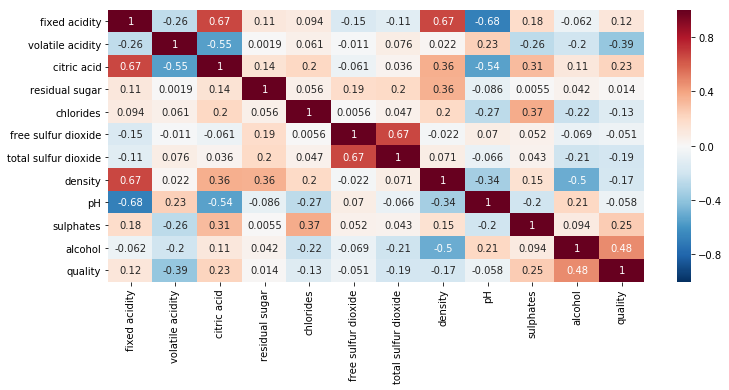

In [45]:
# Load iris data for PCA and LDA
red = pd.read_csv('winequalityred.csv' , sep = ";")

# Checking the corelation between the target variable and predictor variables
correlation = red.corr()
plt.figure(figsize=(12, 5))
seaborn.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [46]:
# Correlation values
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [47]:
# Using cut from pandas to convert continous atrributes to binary values
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
red['quality'] = pd.cut(red['quality'], bins = bins, labels = group_names)

# Using LabelEncoder() to encode class such as bad and good to numbers such as 0 and 1
le = preprocessing.LabelEncoder()
red['quality'] = le.fit_transform(red['quality'])

# Separating target class from data
X = red.drop('quality', axis = 1)
y = red['quality']

In [48]:
# We separate training data and testing data without applying PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 42)

In [54]:
# apply LDA for classification
colors = ['blue', 'red']
lw = 2
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X_train, y_train).transform(X_train)
predictions = lda.predict(X_test)
LDA1acc = accuracy_score(y_test, predictions) * 100
print("Accuracy:",LDA1acc,"%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 86.1111111111 %
Confusion Matrix:
[[1240    1]
 [ 199    0]]
Classification Report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.93      1241
          1       0.00      0.00      0.00       199

avg / total       0.74      0.86      0.80      1440



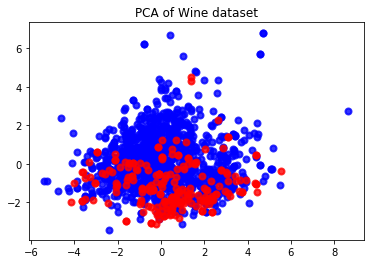

In [50]:
# Scalarizing data (mean = 0 and varience = 1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Applying PCA 
pca = PCA(n_components=2)
X_pc = pca.fit_transform(X)

# Scatter plot of data after applying PCA
for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(X_pc[y == i, 0], X_pc[y == i, 1], color=color, alpha=.8, lw=lw,)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Wine dataset')
plt.show()

In [51]:
# We separate training data and testing data after applying PCA
X_train, X_test, y_train, y_test = train_test_split(X_pc, y, test_size = 0.9, random_state = 42)

In [52]:
# apply LDA for classification after applying PCA
colors = ['blue', 'red', 'green']
lw = 2
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X_train, y_train).transform(X_train)
predictions = lda.predict(X_test)
LDA2acc = accuracy_score(y_test, predictions) * 100
print("Accuracy:",LDA2acc,"%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 86.1111111111 %
Confusion Matrix:
[[1240    1]
 [ 199    0]]
Classification Report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.93      1241
          1       0.00      0.00      0.00       199

avg / total       0.74      0.86      0.80      1440



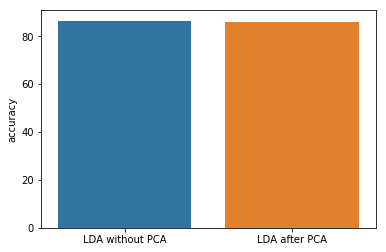

For WINE dataset there is not significant differance in both the approaches.


In [53]:
# Conclusion: 
seaborn.barplot(x=['LDA without PCA', 'LDA after PCA'], y=[LDA1acc, LDA2acc])
plt.ylabel('accuracy')
plt.show()
print("For WINE dataset there is not significant differance in both the approaches.")